Graphing Fireams in America

Team members Tulgaa, Mike, Enerel and Gene into Github account https://github.com/vabigdatamover/dream-team

In [1]:
#Variable, dependables and setup
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import sys
import csv
import os
from pprint import pprint
from pandas import DataFrame
import datetime as dt



In [2]:
## get key from os
#api_key = os.environ.get('weather_api_key')
api_key = os.environ.get('crime_data_api_key')
#print(api_key)

#url = 'https://api.usa.gov/crime/fbi/sapi/api/participation/national?'
url = 'https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2015/2019?'
query_url = url + 'api_key=' + api_key
#print(query_url)

In [3]:
#query_url = 'https://api.usa.gov/crime/fbi/sapi/api/participation/national?api_key=ClcjXmdcuteAVdO0KSC6tVc8TARjLgKJ7OPBXdai'
#print(query_url)

In [4]:
#https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2015-01/2019-01?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [5]:
crime_data = requests.get(query_url).json()

In [6]:
crime_data

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2016,
   'population': 323405935,
   'violent_crime': 1285606,
   'homicide': 17413,
   'rape_legacy': 96970,
   'rape_revised': 132414,
   'robbery': 332797,
   'aggravated_assault': 802982,
   'property_crime': 7928530,
   'burglary': 1516405,
   'larceny': 5644835,
   'motor_vehicle_theft': 767290,
   'arson': 45729},
  {'state_id': None,
   'state_abbr': '',
   'year': 2017,
   'population': 325719178,
   'violent_crime': 1283220,
   'homicide': 17284,
   'rape_legacy': 99856,
   'rape_revised': 135755,
   'robbery': 319356,
   'aggravated_assault': 810825,
   'property_crime': 7694086,
   'burglary': 1401840,
   'larceny': 5519107,
   'motor_vehicle_theft': 773139,
   'arson': 42323},
  {'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 

In [7]:
s_2 = crime_data
s_2

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2016,
   'population': 323405935,
   'violent_crime': 1285606,
   'homicide': 17413,
   'rape_legacy': 96970,
   'rape_revised': 132414,
   'robbery': 332797,
   'aggravated_assault': 802982,
   'property_crime': 7928530,
   'burglary': 1516405,
   'larceny': 5644835,
   'motor_vehicle_theft': 767290,
   'arson': 45729},
  {'state_id': None,
   'state_abbr': '',
   'year': 2017,
   'population': 325719178,
   'violent_crime': 1283220,
   'homicide': 17284,
   'rape_legacy': 99856,
   'rape_revised': 135755,
   'robbery': 319356,
   'aggravated_assault': 810825,
   'property_crime': 7694086,
   'burglary': 1401840,
   'larceny': 5519107,
   'motor_vehicle_theft': 773139,
   'arson': 42323},
  {'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 

In [8]:
s_2['state_id']= 0
s_2

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2016,
   'population': 323405935,
   'violent_crime': 1285606,
   'homicide': 17413,
   'rape_legacy': 96970,
   'rape_revised': 132414,
   'robbery': 332797,
   'aggravated_assault': 802982,
   'property_crime': 7928530,
   'burglary': 1516405,
   'larceny': 5644835,
   'motor_vehicle_theft': 767290,
   'arson': 45729},
  {'state_id': None,
   'state_abbr': '',
   'year': 2017,
   'population': 325719178,
   'violent_crime': 1283220,
   'homicide': 17284,
   'rape_legacy': 99856,
   'rape_revised': 135755,
   'robbery': 319356,
   'aggravated_assault': 810825,
   'property_crime': 7694086,
   'burglary': 1401840,
   'larceny': 5519107,
   'motor_vehicle_theft': 773139,
   'arson': 42323},
  {'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 

In [9]:
#df = pd.DataFrame(s_2)
#df.head()


In [10]:
s1 = crime_data["results"][0]
s1

{'state_id': None,
 'state_abbr': '',
 'year': 2016,
 'population': 323405935,
 'violent_crime': 1285606,
 'homicide': 17413,
 'rape_legacy': 96970,
 'rape_revised': 132414,
 'robbery': 332797,
 'aggravated_assault': 802982,
 'property_crime': 7928530,
 'burglary': 1516405,
 'larceny': 5644835,
 'motor_vehicle_theft': 767290,
 'arson': 45729}

In [11]:
s1['state_id']=[12,13,14]
s1

{'state_id': [12, 13, 14],
 'state_abbr': '',
 'year': 2016,
 'population': 323405935,
 'violent_crime': 1285606,
 'homicide': 17413,
 'rape_legacy': 96970,
 'rape_revised': 132414,
 'robbery': 332797,
 'aggravated_assault': 802982,
 'property_crime': 7928530,
 'burglary': 1516405,
 'larceny': 5644835,
 'motor_vehicle_theft': 767290,
 'arson': 45729}

In [12]:
#data_x =[]
#data_x.append(crime_data)
#data_x.head()

In [13]:
df = pd.DataFrame(s1)
df.head()

,state_id,state_abbr,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
0,12,,2016,323405935,1285606,17413,96970,132414,332797,802982,7928530,1516405,5644835,767290,45729
1,13,,2016,323405935,1285606,17413,96970,132414,332797,802982,7928530,1516405,5644835,767290,45729
2,14,,2016,323405935,1285606,17413,96970,132414,332797,802982,7928530,1516405,5644835,767290,45729


In [14]:
#crime_df = pd.DataFrame(crime_data, columns=['state_id','state_abbr','year','population','violent_crime','homicide',
#                                     'rape_legacy','rape_revised','robbery','aggravated_assault','property_crime',
#                                     'burglary','larceny','motor_vehicle_theft','arson'])

# Writing data to csv file
#weather_data.to_csv(output_data_file, header=True, index=True, index_label= 'Index')

In [15]:
#crime_df.head()

In [16]:
print(json.dumps(crime_data, indent=4, sort_keys=True))

{
    "pagination": {
        "count": 3,
        "page": 0,
        "pages": 1,
        "per_page": 0
    },
    "results": [
        {
            "aggravated_assault": 802982,
            "arson": 45729,
            "burglary": 1516405,
            "homicide": 17413,
            "larceny": 5644835,
            "motor_vehicle_theft": 767290,
            "population": 323405935,
            "property_crime": 7928530,
            "rape_legacy": 96970,
            "rape_revised": 132414,
            "robbery": 332797,
            "state_abbr": "",
            "state_id": [
                12,
                13,
                14
            ],
            "violent_crime": 1285606,
            "year": 2016
        },
        {
            "aggravated_assault": 810825,
            "arson": 42323,
            "burglary": 1401840,
            "homicide": 17284,
            "larceny": 5519107,
            "motor_vehicle_theft": 773139,
            "population": 325719178,
            "prop

In [17]:
# File to Load 
state_population_to_load = "input/state_population.csv"

# Read the firearms data
population_data = pd.read_csv(state_population_to_load)
population_data.head(1)

,Pop_Rank,State,Population
0,1,California,"39,536,653"


In [18]:
# File to Load 
fireams_data_to_load = "input/nics-firearm-background-checks.csv"

# Read the firearms data
firearms_data = pd.read_csv(fireams_data_to_load)
firearms_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,0.0,0.0,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898


In [19]:
#firearms_data.describe()

In [101]:
# Creating a subset DataFrame
bkgnd_chk_tot_data = pd.DataFrame(firearms_data,
                            columns=['month', 'state', 'totals'])

bct_data=bkgnd_chk_tot_data
#bkgnd_chk_tot_data.head()
bct_data.head()
#bct_data['month']

,month,state,totals
0,2019-06,Alabama,42898
1,2019-06,Alaska,5557
2,2019-06,Arizona,26746
3,2019-06,Arkansas,13956
4,2019-06,California,115987


In [102]:
# Grouping the results by month
bct_data_by_mo = bkgnd_chk_tot_data.groupby(['month'])

bc_per_month=bct_data_by_mo['totals'].sum()

bc_per_month.head()

month
1998-11     21176
1998-12    870722
1999-01    585974
1999-02    690215
1999-03    741687
Name: totals, dtype: int64

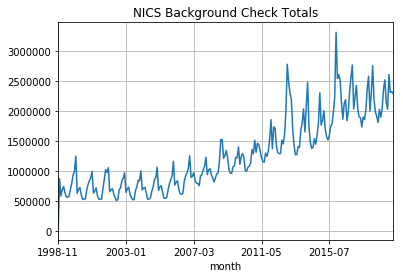

In [103]:
ax1 = bc_per_month.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Background Check Totals')
#plt.xlabel('x label text')
#plt.ylabel('y label text')
#plt.axvline(pd.Timestamp('2013-09'),color='r')

plt.savefig('output/t_chk_per_month.png', bbox_inches="tight")


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

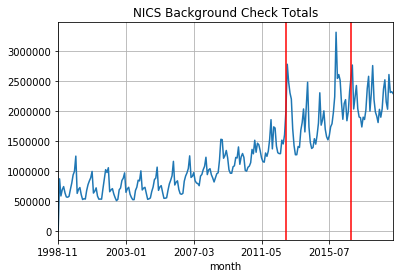

In [115]:
ax1 = bc_per_month.plot.line(x='month', y='totals')

ax = plt.gca() # get axis handle
line = ax.lines[0] # get the first line, there might be more
ff=line.get_xdata()
yy=line.get_ydata()
print(ff)
#print(yy)
plt.axvline(x=168, ymin=0, ymax=1, color="r")
plt.axvline(x=216, ymin=0, ymax=1, color="r")
# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Background Check Totals')
#plt.xlabel('x label text')
#plt.ylabel('y label text')
#plt.axvline(pd.Timestamp('2013-09'),color='r')

plt.savefig('output/t_chk_per_month_vline.png', bbox_inches="tight")


In [105]:
bct_2019 = bct_data[bct_data['month'] >'2019-01'].groupby(['month'])['totals'].sum()
bct_2019.head()

month
2019-02    2028667
2019-03    2604927
2019-04    2305136
2019-05    2320918
2019-06    2291066
Name: totals, dtype: int64

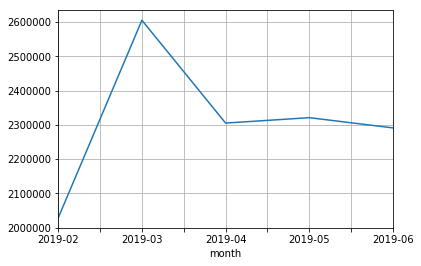

In [106]:
ax1 = bct_2019.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)

In [107]:
bct_range = bct_data[(bct_data['month'] >='2011-05') & (bct_data['month'] <= '2017-5') ].groupby(['month'])['totals'].sum()
bct_range.head()

month
2011-05    1219872
2011-06    1157714
2011-07    1147355
2011-08    1300433
2011-09    1244604
Name: totals, dtype: int64

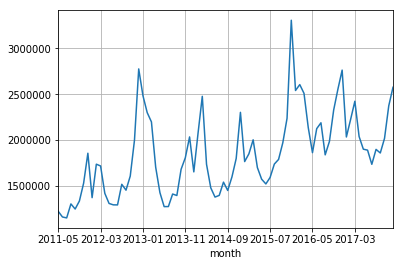

In [108]:
ax1 = bct_range.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)
#plt.savefig('output/2015_2019_bct.png', bbox_inches="tight")
#plt.axvline(x='2016-11', ymin=0, ymax=1, color="r")
#plt.axvline(dt.datetime(2016, 11, 8 ))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
[1219872 1157714 1147355 1300433 1244604 1331836 1527454 1854400 1368816
 1734646 1715125 1416074 1305392 1290210 1289585 1514696 1450737 1604743
 1997703 2776105 2483230 2298561 2197116 1702455 1424450 1270817 1271571
 1408468 1392423 1679099 1805759 2032755 1650565 2073978 2476610 1733651
 1476318 1375135 1393705 1538347 1447485 1595898 1797163 2301386 1763233
 1848308 2001245 1697737 1570893 1518852 1589462 1735911 1786743 1969248
 2236457 3308199 2540146 2604667 2509065 2135909 1860699 2123334 2187190
 1836788 1983596 2326517 2554486 2763115 2032108 2224394 2422749 2037180
 1898840 1888266 1733308 1896457 1857226 2017017 2372888 2575486]


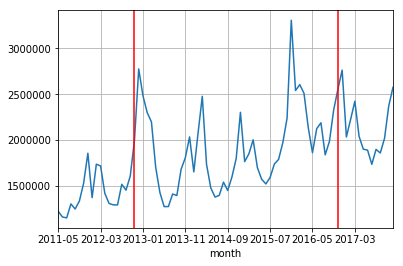

In [109]:
ax1 = bct_range.plot.line(x='month', y='totals')

ax = plt.gca() # get axis handle
line = ax.lines[0] # get the first line, there might be more
ff=line.get_xdata()
yy=line.get_ydata()
print(ff)
print(yy)

# Adding grid, title, and labels
plt.grid(True)
#plt.savefig('output/2015_2019_bct.png', bbox_inches="tight")
plt.axvline(x=18, ymin=0, ymax=1, color="r")
plt.axvline(x=66, ymin=0, ymax=1, color="r")
#plt.axvline(dt.datetime(2016, 11, 8 ))
plt.savefig('output/2011-5_2017-5_bct.png', bbox_inches="tight")

In [110]:
bct_2019 = bct_data[bct_data['month'].str.contains('2019')].groupby(['month'])['totals'].sum()
bct_2019.head()

month
2019-01    2150322
2019-02    2028667
2019-03    2604927
2019-04    2305136
2019-05    2320918
Name: totals, dtype: int64

In [111]:
# Plot the world average as a line chart
#totals_by_month = plt.plot(bc_per_month, color="blue", label="NICS Background Check Totals" )


In [112]:
## Set the 'Country Code' to be our index for easy referencing of rows

#combined_unemployed_data = combined_unemployed_data.set_index("Country Code")

## Collect the mean unemployment rates for the world
#average_unemployment = combined_unemployed_data.mean()

## Collect the years where data was collected
#years = average_unemployment.keys()

## Plot the world average as a line chart
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )


In [113]:
#firearms_2017 = firearms_data[firearms_data['month'].str.contains('2017')]
#firearms_2017.head()

In [114]:
#state_firearms_sum = firearms_data.groupby(['state'])['totals'].sum()
#state_handguns_sum = firearms_2017.groupby(['state'])['handgun'].sum()
#state_handguns_sum.head()

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

Perform ####### (Tulgaa) API Calls

Perform ####### (Mike) API Calls
